## Q10

In [2]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

data = fetch_olivetti_faces()

In [3]:
# Load dataset to variables
X, y = data.data, data.target
data.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

(-0.5, 63.5, 63.5, -0.5)

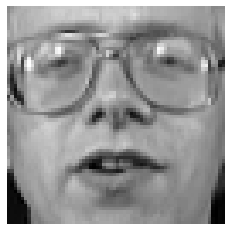

In [4]:
# Sneak peek into an instance
plt.imshow(X[10].reshape(64,64), cmap="gray")
plt.axis("off")

In [5]:
# Split dataset into train, validation and test using stratifed sampling
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for nontest_index, test_index in sss.split(X, y):
    X_test, y_test = X[test_index], y[test_index]
    X_rest, y_rest = X[nontest_index], y[nontest_index]
    
sss_train = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=0)
for train_idx, val_idx in sss_train.split(X_rest, y_rest):
    X_train, y_train = X[train_idx], y[train_idx]
    X_val, y_val = X[val_idx], y[val_idx]   

In [6]:
# Reduce dimensionality (4096) down to 99% variance
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_99 = pca.fit_transform(X_train)
X_valid_99 = pca.transform(X_val)
X_test_99 = pca.transform(X_test)

In [7]:
pca.n_components_

97

In [8]:
# Cluster instances using K-means and figure optimal number of cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

max_cls = 130
k_means_all = []
for k in range(40, max_cls+2, 2):
    kmeans = KMeans(n_clusters=k, n_jobs=-1).fit(X_train_99)
    k_means_all.append(kmeans)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWar

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWar

88

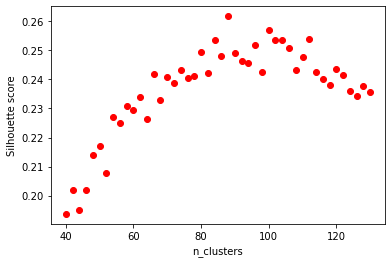

In [9]:
scores = [silhouette_score(X_train_99, model.labels_) for model in k_means_all]

k_array = np.arange(40, max_cls+2, 2)
plt.plot(k_array, scores, 'ro')
plt.xlabel("n_clusters")
plt.ylabel("Silhouette score")
plt.box(on=True)

opt_k = k_array[np.argmax(scores)]
opt_k

In [10]:
best_k = k_means_all[np.argmax(scores)]

In [11]:
import pandas as pd

df_train = pd.DataFrame(np.c_[X_train_99,best_k.labels_])
val_labels = best_k.predict(X_valid_99)

Cluster 1


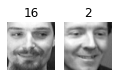

Cluster 4


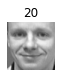

Cluster 5


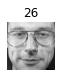

Cluster 6


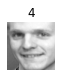

Cluster 8


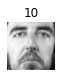

Cluster 11


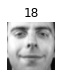

Cluster 14


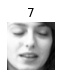

Cluster 15


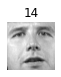

Cluster 16


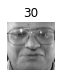

Cluster 17


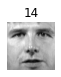

Cluster 18


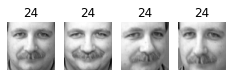

Cluster 19


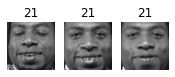

Cluster 20


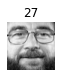

Cluster 23


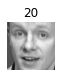

Cluster 24


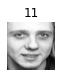

Cluster 25


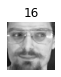

Cluster 26


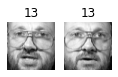

Cluster 28


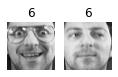

Cluster 29


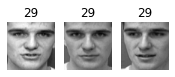

Cluster 30


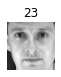

Cluster 35


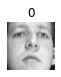

Cluster 39


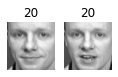

Cluster 40


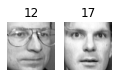

Cluster 42


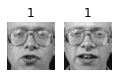

Cluster 44


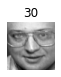

Cluster 45


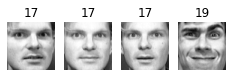

Cluster 46


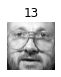

Cluster 49


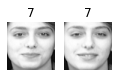

Cluster 50


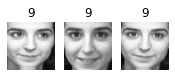

Cluster 55


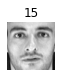

Cluster 56


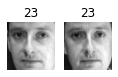

Cluster 57


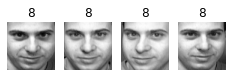

Cluster 58


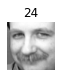

Cluster 62


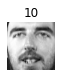

Cluster 63


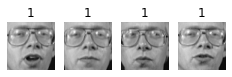

Cluster 66


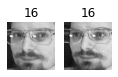

Cluster 68


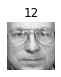

Cluster 70


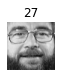

Cluster 73


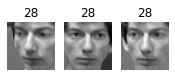

Cluster 75


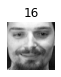

Cluster 76


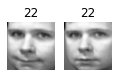

Cluster 77


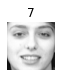

Cluster 79


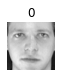

Cluster 80


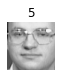

Cluster 82


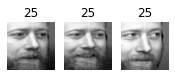

Cluster 83


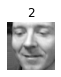

Cluster 86


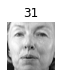

Cluster 87


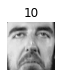

In [12]:
def plotface(faces, labels, n_cols = 8):
    n_rows = (len(labels)-1) // n_cols +1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64,64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()
    
for cluster_id in np.unique(val_labels):
    print("Cluster", cluster_id)
    in_cluster = val_labels==cluster_id
    faces = X_val[in_cluster]
    labels = y_val[in_cluster]
    plotface(faces, labels)
    
    

## Q11

In [13]:
#Train an SVC on original training set and evaluate on validation set
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

svc_kernel = SVC(kernel='poly', degree = 2)

svc_kernel.fit(X_train, y_train)
y_pred = svc_kernel.predict(X_val)

In [14]:
accuracy_score(y_pred, y_val)

0.9625

In [15]:
#Reduce dimensionality using clustering (K-means) and then train a classifier on reduced dataset;
#optimise no. of clusters to minimise error
#No need here to use GridSearch as we already have an allocated validation set

In [16]:
from sklearn.pipeline import Pipeline

for n_clusters in range(80, 121):
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("svc", SVC(kernel='poly',degree=2))
    ])
    pipeline.fit(X_train, y_train)
    print(f'{n_clusters} clusters: {pipeline.score(X_val, y_val)}')

80 clusters: 0.8625
81 clusters: 0.8625
82 clusters: 0.875
83 clusters: 0.9
84 clusters: 0.9
85 clusters: 0.9
86 clusters: 0.9
87 clusters: 0.8625
88 clusters: 0.8625
89 clusters: 0.8875
90 clusters: 0.8875
91 clusters: 0.9125
92 clusters: 0.9125
93 clusters: 0.9125
94 clusters: 0.9125
95 clusters: 0.9125
96 clusters: 0.8875
97 clusters: 0.9
98 clusters: 0.9
99 clusters: 0.9
100 clusters: 0.9
101 clusters: 0.9
102 clusters: 0.9125
103 clusters: 0.9
104 clusters: 0.9
105 clusters: 0.9
106 clusters: 0.875
107 clusters: 0.875
108 clusters: 0.875
109 clusters: 0.875
110 clusters: 0.875
111 clusters: 0.875
112 clusters: 0.875
113 clusters: 0.9125
114 clusters: 0.875
115 clusters: 0.875
116 clusters: 0.875
117 clusters: 0.9
118 clusters: 0.9
119 clusters: 0.9
120 clusters: 0.9


In [17]:
best_kmeans = KMeans(n_clusters=91)
best_kmeans.fit(X_train, y_train)

KMeans(n_clusters=91)

It looks that for the optimum 113 clusters, the validation score is substantially lower than using the full dataset

In [18]:
#Append the reduced set features to the original dataset and retrain
#Pay attention to scale added features in line with original feaures (0,1)

In [19]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
X_train_cls = minmax.fit_transform(best_kmeans.transform(X_train))
X_val_cls = minmax.transform(best_kmeans.transform(X_val))
X_train_aug, X_val_aug = np.c_[X_train, X_train_cls], np.c_[X_val, X_val_cls]

In [20]:
svc_kernel.fit(X_train_aug, y_train)
#clf.score(X_train_aug, y_train)

SVC(degree=2, kernel='poly')

In [21]:
svc_kernel.score(X_val_aug, y_val)

0.9625

## Q12

In [35]:
#Train a Gaussian Mixture model on a PCA-reduced dataset (99% variance)
from sklearn.mixture import GaussianMixture

pca = PCA(n_components=0.95)
X_95 = pca.fit_transform(X)

gaussMix = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X_95)
             for k in range(1, 40)]

bics = [model.bic(X_95) for model in gaussMix]
aics = [model.aic(X_95) for model in gaussMix]

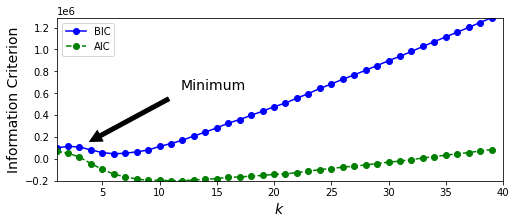

In [38]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 40), bics, "bo-", label="BIC")
plt.plot(range(1, 40), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1,40, np.min(aics) - 50, np.max(bics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [63]:
best_gauss = gaussMix[9]
best_gauss.fit(X_95)

GaussianMixture(n_components=10, n_init=10, random_state=42)

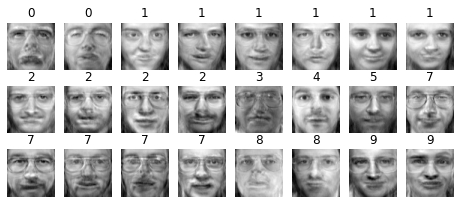

In [69]:
n_sampled = 24
X_sampled, y_sampled = best_gauss.sample(n_samples=n_sampled)
inverted_faces = pca.inverse_transform(X_sampled)
plotface(inverted_faces, y_sampled)

In [158]:
n_rotated, n_flipped, n_dark = 4, 3, 3

# Rotate images 90deg (=matrix transpose)
rotated = np.transpose(X_train[:n_rotated].reshape(-1,64,64),axes=[0,2,1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

# Flip images
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

# Darken image (increase gray-scale value)
darkened = X_train[:n_dark].copy()
darkened[:, 0:-1] *= 0.12
y_darkened = y_train[:n_dark]

transformed = np.r_[rotated, flipped, darkened]
y_transformed = np.concatenate([y_rotated,y_flipped, y_darkened])
y_transformed

array([18, 25, 18, 26, 18, 25, 18, 18, 25, 18])

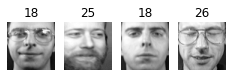

In [138]:
# Original images
plotface(X_train[:4],y_train[:4])

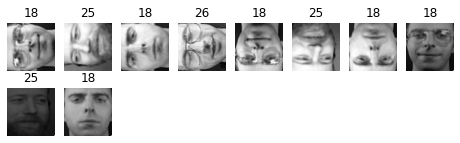

In [159]:
# Transformed images
plotface(transformed,y_transformed)

In [165]:
# Compute PDF values for transformed images (note: score_samples returns the log of PDF)
X_trans_95 = pca.transform(transformed)
np.exp(best_gauss.score_samples(X_trans_95))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

The transformed instances are viewed as highly unlikely to have resulted from the Gaussian Mixture model trained

In [171]:
np.exp(best_gauss.score_samples(X_95[:4]))

array([6.90093481e+179, 1.59659022e+182, 6.90035596e+179, 8.15081005e+243])